# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Notebook Presentation

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv(r'Data_files/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
# print(type(data.loc[0, 'USD_Worldwide_Gross']))
data.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"


In [6]:
print(f'NaN values count: {data.isna().any(axis=1).sum()}')

NaN values count: 0


In [7]:
print(f'Duplicated values count: {data.duplicated().sum()}')
print(f'Duplicated titles count: {data.duplicated(subset='Movie_Title').sum()}')
print(f'Duplicated titles & dates count: {data.duplicated(subset=['Movie_Title', 'Release_Date']).sum()}')

Duplicated values count: 0
Duplicated titles count: 73
Duplicated titles & dates count: 1


### Show movies with the same titles

In [8]:
print(data[data.duplicated(subset='Movie_Title', keep=False)].shape)

data[data.duplicated(subset='Movie_Title', keep=False)].sort_values(by='Movie_Title')

(143, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
64,3973,12/23/1954,"20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
393,4662,9/11/1984,A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
...,...,...,...,...,...,...
1096,2427,6/3/1998,Twilight,"$20,000,000","$15,055,091","$15,055,091"
852,2638,2/23/1996,Unforgettable,"$18,000,000","$2,483,790","$2,483,790"
5342,3180,4/21/2017,Unforgettable,"$12,000,000","$15,668,012","$11,368,012"
3848,1321,2/18/2011,Unknown,"$40,000,000","$136,123,083","$63,686,397"


### Show duplicated movies (the same release date & title)

In [9]:
data[data.duplicated(subset=['Movie_Title', 'Release_Date'], keep=False)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


### Data Type Conversions

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
for (label, column) in data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].items():
    data[label] = data[label].str.replace('$', '')
    data[label] = data[label].str.replace(',', '')
    data[label] = data[label].astype(float)

data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget           float64
USD_Worldwide_Gross             float64
USD_Domestic_Gross              float64
dtype: object

In [12]:
data.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [13]:
data.select_dtypes('number').describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Search for Star Wars

In [14]:
data[data['Movie_Title'].str.contains('Star Wars')].sort_values(by='Release_Date')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
221,3239,1977-05-25,Star Wars Ep. IV: A New Hope,"11,000,000.00","786,598,007.00","460,998,007.00"
275,2196,1980-05-21,Star Wars Ep. V: The Empire Strikes Back,"23,000,000.00","534,171,960.00","290,271,960.00"
359,1657,1983-05-25,Star Wars Ep. VI: Return of the Jedi,"32,500,000.00","572,705,079.00","309,205,079.00"
1249,272,1999-05-19,Star Wars Ep. I: The Phantom Menace,"115,000,000.00","1,027,044,677.00","474,544,677.00"
1810,274,2002-05-16,Star Wars Ep. II: Attack of the Clones,"115,000,000.00","656,695,615.00","310,676,740.00"
2436,273,2005-05-19,Star Wars Ep. III: Revenge of the Sith,"115,000,000.00","848,998,877.00","380,270,577.00"
3202,3569,2008-08-15,Star Wars: The Clone Wars,"8,500,000.00","68,695,443.00","35,161,554.00"
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","2,058,662,225.00","936,662,225.00"
5293,38,2016-12-16,Rogue One: A Star Wars Story,"200,000,000.00","1,050,988,488.00","532,177,324.00"


### str contains with nan values

In [15]:
import numpy as np
test_df = pd.DataFrame({'A': [11, 22, 33], 'B': ['Star afda gfg', 'dafafd', np.nan]})
test_df

,A,B
0,11,Star afda gfg
1,22,dafafd
2,33,NaN


In [16]:
print(f'{test_df['B'].str.contains('Star')}\n')
print(f'{test_df['B'].str.contains('Star', na=False)}')

0     True
1    False
2      NaN
Name: B, dtype: object

0     True
1    False
2    False
Name: B, dtype: bool


In [17]:
test_df[test_df['B'].str.contains('Star', na=False)]

,A,B
0,11,Star afda gfg


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
data.sample(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5367,162,2017-07-21,Dunkirk,"150,000,000.00","235,907,054.00","104,641,608.00"
4805,2200,2015-01-16,The Wedding Ringer,"23,000,000.00","80,171,596.00","64,460,211.00"
3656,3109,2010-05-21,Solitary Man,"12,500,000.00","4,360,548.00","4,360,548.00"


In [19]:
print(f'Number of films which grossed $0 in USA: {(data['USD_Domestic_Gross'] == 0).sum()}')

Number of films which grossed $0 in USA: 512


In [20]:
print('Highest budget films that grossed nothing:\n')

data[(data['USD_Domestic_Gross'] == 0)].sort_values(by='USD_Production_Budget', ascending=False).head()

Highest budget films that grossed nothing:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


In [21]:
data.loc[(data['USD_Domestic_Gross'] == 0), 'USD_Production_Budget'].agg(['min', 'max']).to_frame(name='USD_Production_Budget_for_gross_0_films')

,USD_Production_Budget_for_gross_0_films
min,"1,400.00"
max,"175,000,000.00"


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [22]:
data.sample(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4473,62,2013-10-05,The Great Gatsby,"190,000,000.00","351,040,419.00","144,840,419.00"


In [23]:
print(f'Number of films which grossed $0 worldwide: {(data['USD_Worldwide_Gross'] == 0).sum()}')

Number of films which grossed $0 worldwide: 357


In [24]:
print('Highest budget films that grossed nothing worldwide:\n')

data[(data['USD_Worldwide_Gross'] == 0)].sort_values(by='USD_Production_Budget', ascending=False).head()

Highest budget films that grossed nothing worldwide:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00


In [25]:
data.loc[(data['USD_Worldwide_Gross'] == 0), 'USD_Production_Budget'].agg(['min', 'max']).to_frame(name='USD_Production_Budget_for_gross_0_films_ww')

,USD_Production_Budget_for_gross_0_films_ww
min,"1,400.00"
max,"175,000,000.00"


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [26]:
print('Highest budget films that grossed nothing in USA:\n')

data.query('USD_Domestic_Gross == 0').sort_values(by='USD_Production_Budget', ascending=False).head(3)

Highest budget films that grossed nothing in USA:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00


In [27]:
print('Highest budget films that grossed nothing worldwide:\n')

data.query('USD_Worldwide_Gross == 0').sort_values(by='USD_Production_Budget', ascending=False).head(3)

Highest budget films that grossed nothing worldwide:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00


In [28]:
print(f'Number of films which grossed $0 in USA but had some worldwide gross revenue: {data.query('(USD_Domestic_Gross == 0) & (USD_Worldwide_Gross > 0)').shape[0]}\n')

print('Subset of international releases that had some worldwide gross revenue, but made zero revenue in the United States:\n')
data.query('(USD_Domestic_Gross == 0) & (USD_Worldwide_Gross > 0)').sample(3)

Number of films which grossed $0 in USA but had some worldwide gross revenue: 155

Subset of international releases that had some worldwide gross revenue, but made zero revenue in the United States:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4069,4464,2011-12-31,La Cara Oculta,"2,600,000.00","7,033,931.00",0.00
3913,3479,2011-06-21,You Got Served: Beat The World,"10,000,000.00","1,230,542.00",0.00
4133,3284,2012-04-05,LOL,"11,000,000.00","10,431,506.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [29]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

#### Number of films included in the dataset that have not yet had a chance to be screened in the box office:

In [30]:
data.query("Release_Date > @pd.Timestamp('2018-5-1')").shape[0]

7

#### Films included in the dataset that have not yet had a chance to be screened in the box office:

In [31]:
data.query('Release_Date > @scrape_date')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00


In [32]:
data_clean = data.query("Release_Date <= @pd.Timestamp('2018-5-1')")
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [33]:
# Version 1
(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross').shape[0] / data_clean.shape[0]) * 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [34]:
data['Release_Date'].max()

Timestamp('2020-12-31 00:00:00')

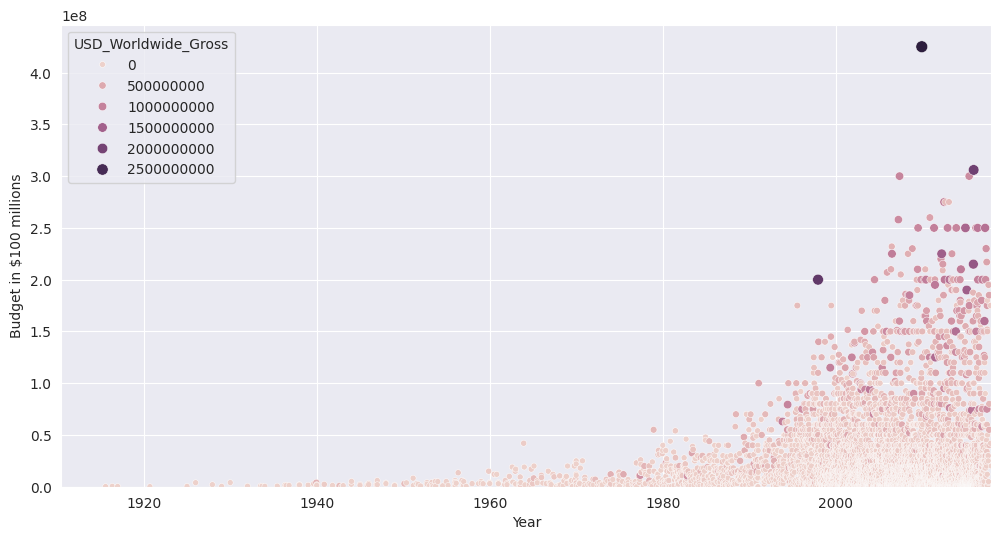

In [35]:
plt.figure(figsize=(12, 6))

with sns.axes_style('darkgrid'):
    ax1 = sns.scatterplot(
        data=data_clean,
        x='Release_Date', y='USD_Production_Budget',
        size='USD_Worldwide_Gross', hue='USD_Worldwide_Gross'
    )
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Budget in $100 millions')

    ax1.set_xlim(right=data_clean['Release_Date'].max())
    ax1.set_ylim(bottom=0)

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [36]:
decades = pd.DatetimeIndex(data=data_clean['Release_Date']).year
decades = (decades // 10) * 10
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)

In [37]:
data_clean['Decades'] = decades

data_clean.sample(3)

C:\Users\pc\AppData\Local\Temp\ipykernel_11660\584211411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decades'] = decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
2351,773,2004-12-22,Meet the Fockers,"60,000,000.00","516,567,575.00","279,167,575.00",2000
432,1822,1986-01-08,Howard the Duck,"30,000,000.00","16,295,774.00","16,295,774.00",1980
4395,224,2013-05-31,After Earth,"130,000,000.00","251,499,665.00","60,522,097.00",2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [39]:
old_films = data_clean.query('Decades < 1970')
new_films = data_clean.query('Decades >= 1970')

print(f'Number of films released prior to 1970: {old_films.shape[0]}')
print('The most expensive films made prior to 1970:\n')
old_films.sort_values(by='USD_Production_Budget', ascending=False).head(3)

Number of films released prior to 1970: 153
The most expensive films made prior to 1970:



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,"42,000,000.00","71,000,000.00","57,000,000.00",1960
150,2175,1969-12-16,"Hello, Dolly","24,000,000.00","33,208,099.00","33,208,099.00",1960
143,2465,1969-01-01,Sweet Charity,"20,000,000.00","8,000,000.00","8,000,000.00",1960


# Seaborn Regression Plots

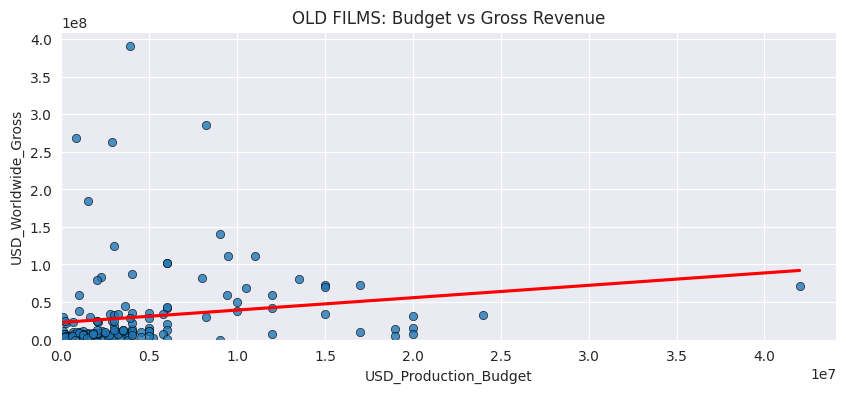

In [71]:
plt.figure(figsize=(10, 4))
with sns.axes_style('darkgrid'):
    ax1 = sns.regplot(
        data=old_films,
        x='USD_Production_Budget', y='USD_Worldwide_Gross',
        ci=None, line_kws={'color': 'red'}, scatter_kws={'edgecolors': 'black', 'linewidths': 0.5}
    )
    ax1.set_ylim(-0.8)
    ax1.set_xlim(-0.8)
    ax1.set_title('OLD FILMS: Budget vs Gross Revenue')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (##).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [54]:
new_films.sample(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
4499,2247,2013-11-22,Delivery Man,"22,000,000.00","70,536,870.00","30,659,817.00",2010


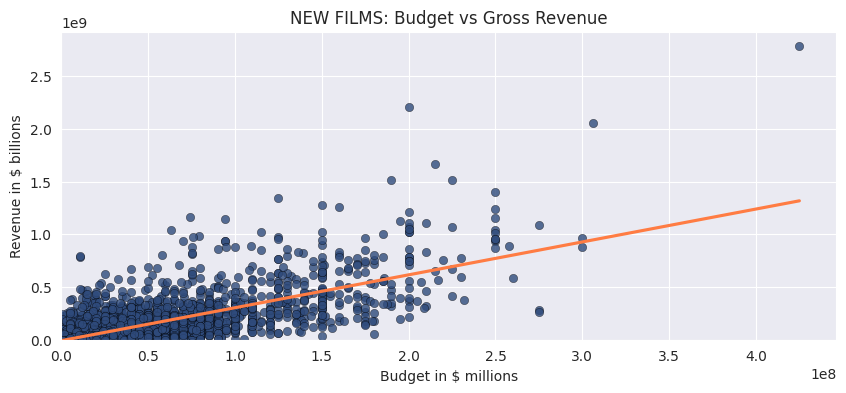

In [99]:
plt.figure(figsize=(10, 4))
with sns.axes_style('darkgrid'):
    ax1 = sns.regplot(
        data=new_films,
        x='USD_Production_Budget', y='USD_Worldwide_Gross',
        ci=None, line_kws={'color': '#ff7c43'}, scatter_kws={'color': '#2f4b7c', 'edgecolors': 'black', 'linewidths': 0.3}
    )
    ax1.set_title('NEW FILMS: Budget vs Gross Revenue')
    ax1.set_ylabel("Revenue in $ billions")
    ax1.set_xlabel("Budget in $ millions")
    ax1.set_ylim(0)
    ax1.set_xlim(0)

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

#### Regression of *Gross Revenue* onto *Budget* for *New films*

In [139]:
y = new_films['USD_Worldwide_Gross'].to_frame()
X = new_films['USD_Production_Budget'].to_frame()

ln_regr = LinearRegression()
ln_regr.fit(X, y)

LinearRegression()

In [140]:
# print(f' Intercept: {round(ln_regr.intercept_[0], 3)}')
# print(f' Coefficients: {round(ln_regr.coef_[0, 0], 3)}')
# print('\n')

estimates = pd.DataFrame(
    data={'Estimates NF': [ln_regr.intercept_[0], ln_regr.coef_[0, 0], ln_regr.score(X, y)]},
    index=['Intercept', 'Coefficient', 'R^2']
)

estimates

,Estimates NF
Intercept,"-8,650,768.01"
Coefficient,3.12
R^2,0.56


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

#### Regression of *Gross Revenue* onto *Budget* for *Old films*

In [141]:
old_films.sample(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00,1920


In [142]:
X = old_films['USD_Production_Budget'].to_frame()
y = old_films['USD_Worldwide_Gross'].to_frame()

of_ln_regr = LinearRegression()
of_ln_regr.fit(X, y)

LinearRegression()

In [143]:
estimates_of = pd.DataFrame(
    data={'Estimates OF': [of_ln_regr.intercept_[0], of_ln_regr.coef_[0, 0], of_ln_regr.score(X, y)]},
    index=['Intercept', 'Coefficient', 'R^2']
)

estimates_of

,Estimates OF
Intercept,"22,821,538.64"
Coefficient,1.65
R^2,0.03


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [162]:
est = of_ln_regr.predict(pd.DataFrame(data={'USD_Production_Budget': 350000000}, index=[0]))

pd.DataFrame(data={'Estimated Revenue': est[0, 0]}, index=['$350M'])

,Estimated Revenue
$350M,"599,521,139.04"
